# CHAPTER 2 - The Tools of the Trade in Quantum Computing - Qiskit Code

*Note*: You may skip the following two cells if you have alredy installed the right versions of all the libraries mentioned in *Appendix D*. This will likely NOT be the case if you are running this notebook on a cloud service such as Google Colab.

In [2]:
from qiskit import *

In [3]:
qreg1 = QuantumRegister(size = 2, name = "qrg1")
qreg2 = QuantumRegister(1, "qrg2")
creg = ClassicalRegister(1, "oldschool")

qc = QuantumCircuit(qreg1, creg, qreg2)

In [4]:
qc.draw()

qrg1_0: 
             
     qrg1_1: 
             
       qrg2: 
             
oldschool: 1/

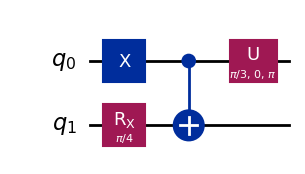

In [5]:
import numpy as np

qc = QuantumCircuit(2) # Initialise the circuit.

# We can now apply the gates sequentially.
qc.x(0)
qc.rx(np.pi/4, 1)
qc.cx(0, 1)
qc.u(np.pi/3, 0, np.pi, 0)

qc.draw("mpl")

In [6]:
from qiskit_aer import AerSimulator

In [7]:
sim = AerSimulator()
sim_GPU = AerSimulator(device = 'GPU')

In [8]:
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.measure(range(2), range(2))

job = execute(qc, sim, shots = 1024)
result = job.result()
counts = result.get_counts()
print(counts)

NameError: name 'execute' is not defined

In [ ]:
from qiskit.visualization import *
plot_histogram(counts)

In [ ]:
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.save_statevector()
qc.measure(0,0)
qc.measure(1,1)

result = execute(qc, sim, shots = 1024).result()
sv = result.get_statevector()
print(sv)
counts = result.get_counts()
print(counts)

In [ ]:
sim_u = AerSimulator(method = 'unitary')

qc = QuantumCircuit(1)
qc.h(0)
qc.save_unitary()

result = execute(qc, sim_u).result()
U = result.get_unitary(decimals = 4)
print(U)

*Note*: In the following cell, you need to replace "1234" with your actual IBM token. Refer to *Appendix D* in the book for instructions on how to create an account and get your token. Be very careful not to disclose your token to anyone!

In [ ]:
ibm_token="1234"
IBMQ.save_account(ibm_token)

In [ ]:
provider = IBMQ.load_account()
print(provider.backends(simulator = False))

In [ ]:
dev_list = provider.backends(
    filters = lambda x: x.configuration().n_qubits >= 5,
    simulator = False)

In [ ]:
from qiskit.providers.ibmq import *
dev = least_busy(dev_list)

In [ ]:
from qiskit.providers.ibmq.job import job_monitor

# Let us set up a simple circuit.
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.measure_all()

# First, we run the circuit using the statevector simulator.
sim = AerSimulator()
result = execute(qc, sim, shots = 1024).result()
counts_sim = result.get_counts()

# Now we run it on the real device that we selected before.
job = execute(qc, dev, shots = 1024)
job_monitor(job)

result = job.result()
counts_dev = result.get_counts()

In [ ]:
print(counts_sim)
print(counts_dev)